In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
np.set_printoptions(precision=4)

### Carga dos dados

In [25]:
df_seg = pd.read_json('./datasets/extracao-segmentos-atos.json')

### Estrutura da fonte de dados

In [26]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206488 entries, 0 to 206487
Data columns (total 6 columns):
id_ato      206488 non-null int64
data_pub    206488 non-null object
tipo_ato    206488 non-null object
id_seg      206488 non-null int64
tipo_seg    206488 non-null object
txt_seg     206488 non-null object
dtypes: int64(2), object(4)
memory usage: 9.5+ MB


#### Notas:
* 206.488 observações (segmentos)
* Nenhum valor ausente
* txt_seg contém o texto dos segmentos a serem analisados
* tipo_seg a variável alvo (labels)

In [27]:
# Conversão do atributo data_pub para formato de data
df_seg['data_pub'] = pd.to_datetime(df_seg['data_pub'])

### Análise da quantidade de atos por tipo de ato

In [63]:
qtd_ato_por_tipo = df_seg[['tipo_ato', 'id_ato']].groupby('tipo_ato')['id_ato'].nunique()
df_qtd_ato_por_tipo = pd.DataFrame(qtd_ato_por_tipo)
df_qtd_ato_por_tipo.columns = ['qtd_ato']
df_qtd_ato_por_tipo.reset_index(inplace=True)
df_qtd_ato_por_tipo.sort_values(by='qtd_ato', ascending=False, inplace=True)

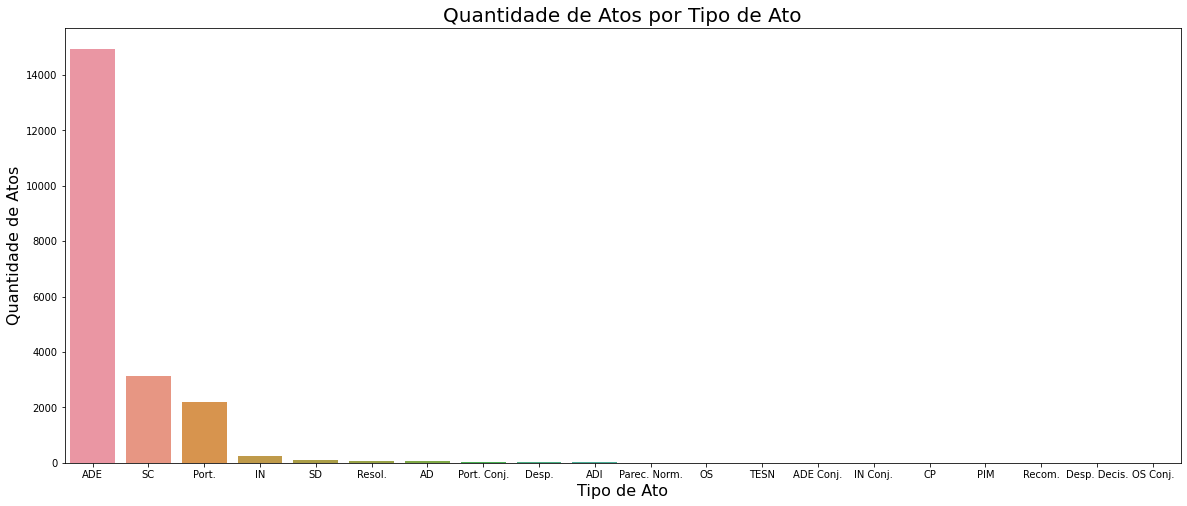

In [64]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_ato', y='qtd_ato', data=df_qtd_ato_por_tipo)
ax.set_title('Quantidade de Atos por Tipo de Ato', fontsize=20)
ax.set_ylabel('Quantidade de Atos', fontsize=16)
ax.set_xlabel('Tipo de Ato', fontsize=16)
plt.show()

In [73]:
qtd_ato_ade = df_qtd_ato_por_tipo[df_qtd_ato_por_tipo['tipo_ato'] == 'ADE']['qtd_ato'].iloc[0]
qtd_total_ato = df_qtd_ato_por_tipo['qtd_ato'].sum()
perc_ato_ade = qtd_ato_ade/qtd_total_ato
print('Quantidade de atos do tipo ADE: {:5d}'.format(qtd_ato_ade))
print('Quantidade total de atos: {:5d}'.format(qtd_total_ato))
print('Percentual de atos do tipo ADE: {:5.2f}%'.format(perc_ato_ade*100))

Quantidade de atos do tipo ADE: 14948
Quantidade total de atos: 20821
Percentual de atos do tipo ADE: 71.79%


#### Notas:
* Atos do tipo ADE representam mais 71.79% do total de atos 

### Análise da quantidade de segmentos por tipo de segmento

In [75]:
qtd_seg_tipo = df_seg[['id_seg', 'tipo_seg']].groupby('tipo_seg').count().sort_values("id_seg", ascending=False)
qtd_seg_tipo.columns = ['qtd_seg']
qtd_seg_tipo.reset_index(inplace=True)

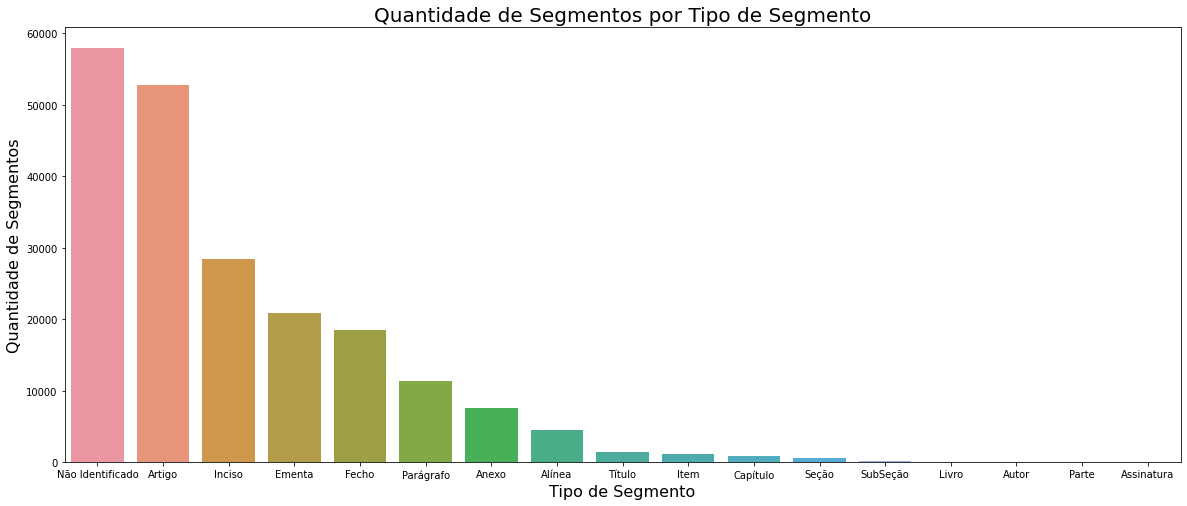

In [76]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_seg', y='qtd_seg', data=qtd_seg_tipo)
ax.set_title('Quantidade de Segmentos por Tipo de Segmento', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
plt.show()

In [78]:
qtd_seg_tipo

,tipo_seg,qtd_seg
0,Não Identificado,57941
1,Artigo,52808
2,Inciso,28479
3,Ementa,20824
4,Fecho,18571
5,Parágrafo,11404
6,Anexo,7549
7,Alínea,4475
8,Título,1424
9,Item,1218


#### Notas:
* Segmentos não identificados são maioria
* Investigar hipóteses:
  * Omissão da classificação manual (segmento deveria ser de outra classe)?
  * A classe está sendo usada para alguma situação específica?

### Análise da quantidade de segmentos não identificados por ano

In [79]:
qtd_seg_ano = df_seg[df_seg['tipo_seg']=='Não Identificado'].groupby(df_seg['data_pub'].dt.year)['id_seg'].count()
df_qtd_seg_ano = pd.DataFrame(qtd_seg_ano)
df_qtd_seg_ano.reset_index(inplace=True)
df_qtd_seg_ano.columns = ['ano_pub', 'qtd_seg']

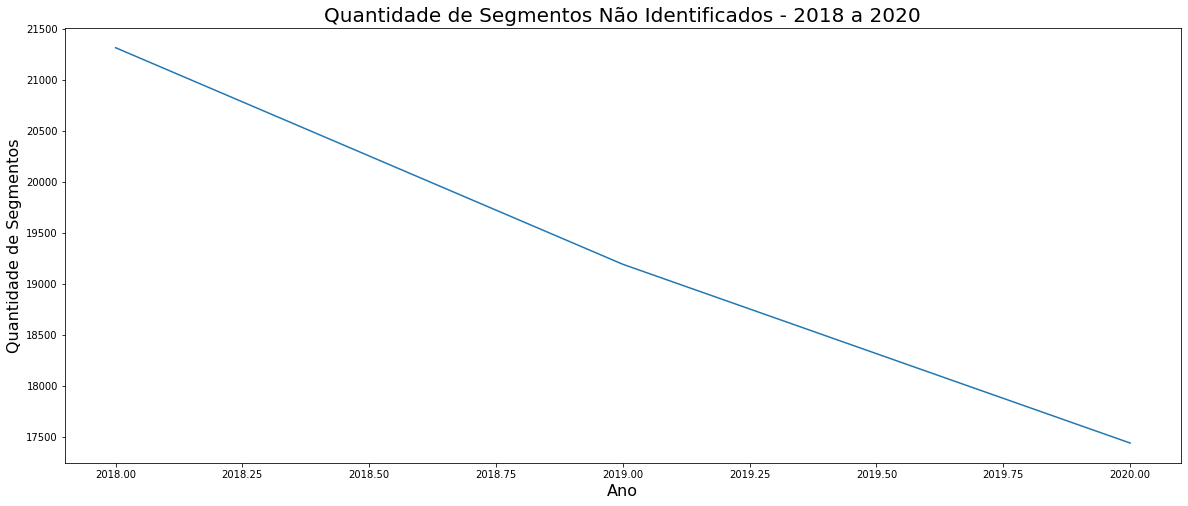

In [81]:
fig = plt.figure(figsize=(20,8))
ax = sns.lineplot(x='ano_pub', y='qtd_seg', data=df_qtd_seg_ano)
ax.set_title('Quantidade de Segmentos Não Identificados - 2018 a 2020', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Ano', fontsize=16)
plt.show()